---

# TP 6 : Optimization with constraints

<b>Sorbonne University</b><br>
Author : Marie Postel
---
$
\renewcommand{\R}{\mathbb{R}}
\newcommand{\eps}{\varepsilon}
$


### In this notebook we illustrate the minimization of a quadratic function under linear constraints 

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt


In [2]:
A=np.array([[6,-3],[-3,10]])
C=np.array([1,1])

In [3]:
def f(x):
    return 0.5*A.dot(x).dot(x)


(-1.0, 1.0)

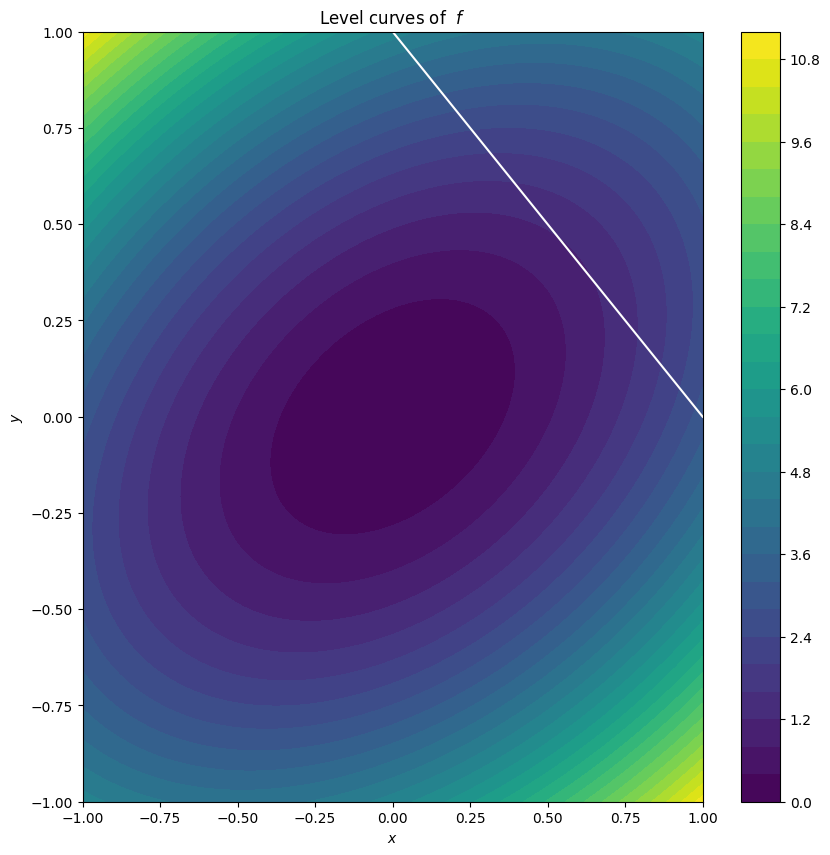

In [4]:
# Graphique
xx = np.linspace(-1,1,200)
yy = np.linspace(-1,1,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Level curves of  $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
xc=np.array([-1,1])
yc=(1-xc*C[0])/C[1]
plt.plot(xc,yc,'-w')
plt.colorbar()
plt.ylim([-1,1])
### BEGIN SOLUTION
#plt.plot(xs[0],xs[1],'rx')
### END SOLUTION


### Question 1 : Computer the solution of the constrained problem
$\inf_{C(x)=0} f(x)$  with $f(x)=\dfrac{1}{2}Ax\cdot x$ and $C(x)=C\cdot x-1$

=== BEGIN SOLUTION ===
The Lagrangian of the constrained problem $c\cdot x=0$ is
$$\ell(x,z)=\dfrac{1}{2}Ax\cdot x+\lambda (C\cdot x-1).$$
Its gradient is
$$\nabla_x \ell(x,z)=Ax+\lambda c.$$
The theorem of constrained extrema states:
$$Ax^\star+\lambda^\star c=0.$$
We obtain $x^\star$ in terms of $\lambda^\star$
$$x^\star=-\lambda^\star A^{-1}C,$$

Hence, by injecting into the constraint $ C\cdot x^\star=1$
$$-\lambda^\star A^{-1}C\cdot C=1$$

From this, we derive
$$\lambda^\star=-\dfrac{1}{A^{-1}C\cdot C},$$
then
$$x^\star=-\lambda^\star A^{-1}C.$$
=== END SOLUTION ===

Question 2 : Compute the solution with numpy.linalg.solve

In [5]:
ys=np.linalg.solve(A,C)
ls=-1/ys.dot(C)
xs=-ls*ys
print(xs,ls)

[0.59090909 0.40909091] -2.318181818181818


### Question 3 Draw the isovalues of $f$, the admissible set, and the solution $x^\star$

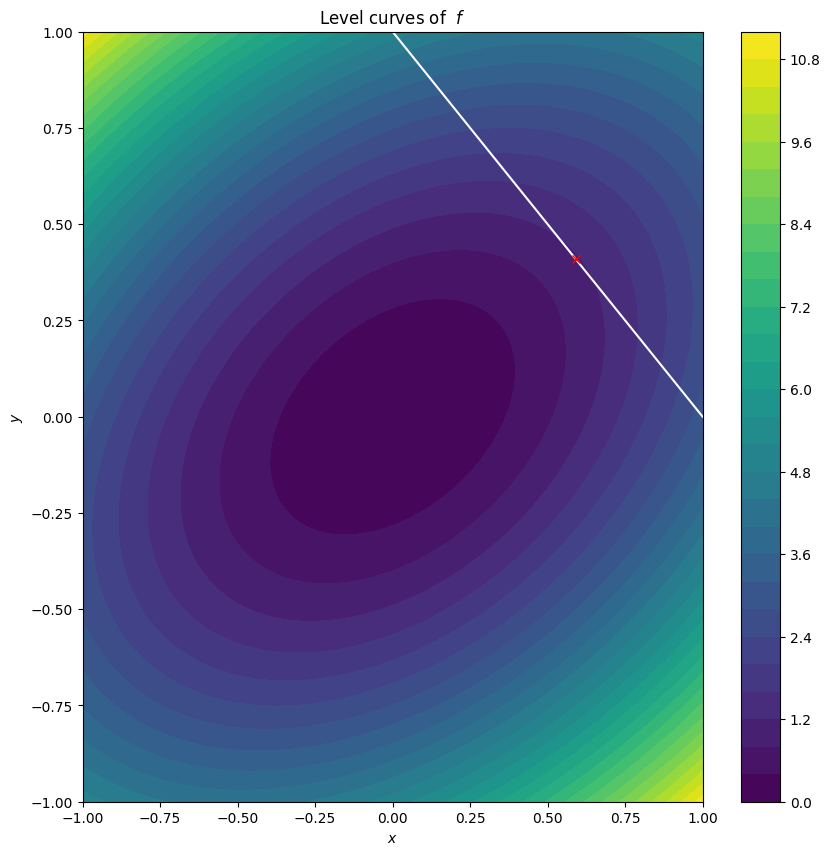

In [6]:
# Graphique
xx = np.linspace(-1,1,200)
yy = np.linspace(-1,1,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Level curves of  $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
xc=np.array([-1,1])
yc=(1-xc*C[0])/C[1]
plt.plot(xc,yc,'-w')
plt.colorbar()
plt.ylim([-1,1])
### BEGIN SOLUTION
plt.plot(xs[0],xs[1],'rx')
### END SOLUTION


### Second case  : constrained  linear least square



Let $A$ be a real matrix with $p$ rows and $n$ columns, of rank equal to $n$ (we assume $p>n$).
Let $b\in \mathbb{R}^p$ and $x\in\mathbb{R}^n$. We  define $$f(x) = ||Ax-b||^2.
$$

#### Question 4
<ol>
<li> Recall  the expression of the minimum of  $f$  without constraints</li>
</ol>

=== BEGIN SOLUTION ===

The global minimum of $f$ is the vector for which the gradient is null  $\nabla f(x)=2A^T(Ax-b)$ i.e. $$x^\star=(A^tA)^{-1}A^Tb$$.

=== END SOLUTION ===

#### Question 5
Define the following data in  numpy arrays
$$A=\begin{pmatrix}2  & 1 \\
1& 2 \\
0 & 1 \\
1 & 0\end{pmatrix},\quad b=\begin{pmatrix}1\\2\\3\\4\end{pmatrix}.$$

In [7]:
### BEGIN SOLUTION
A=np.array([[2,1],[1,2],[0,1],[1,0]])
b=np.array([1,2,3,4])
### END SOLUTION

#### Question 6
Compute the global minimum $xs$ of $f$ by solving a linear system

In [8]:
### BEGIN SOLUTION
xs=np.linalg.solve(A.T.dot(A),A.T.dot(b))
### END SOLUTION
print(xs)

[0.8 0.8]


In [9]:
if not isinstance(xs, np.ndarray):
    print("your solution is not a numpy array")
assert len(xs)==2, "your solution does not have the correct dimension"
assert np.linalg.norm(xs-np.array([0.8,0.8]))<1.e-6 , "your solution is incorrect"


#### Question 7
Program the function  $f$ 

In [10]:
### BEGIN SOLUTION
def f(x):
    return np.linalg.norm(A.dot(x)-b)**2
### END SOLUTION

#### Question 8
Plot the contour lines of $f$ using the following code.
Add the global minimum $xs$ with a red cross.

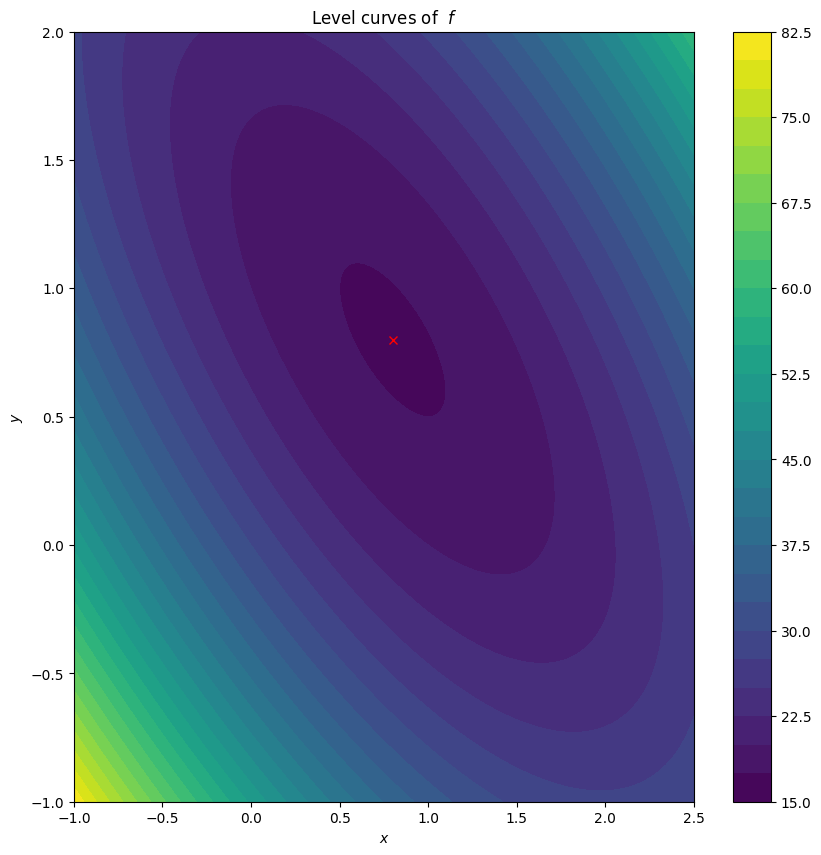

In [11]:
# Graphique
xx = np.linspace(-1,2.5,200)
yy = np.linspace(-1,2,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Level curves of  $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
plt.colorbar()
### BEGIN SOLUTION
plt.plot(xs[0],xs[1],'rx')
### END SOLUTION


#### Question 9
For $c\in \mathbb{R}^n$ and $x\in \mathbb{R}^n$, consider the problem (P): Minimize $f(x)$
subject to the constraint $c^Tx=0$.

On paper:
<ol>
<li> Give the expression of the Lagrangian associated with (P).
<li> Give the expression of the gradient of the Lagrangian associated with (P).
<li> Write the optimality conditions using the theorem of constrained extrema.

    Hint: first express $x^*$ in terms of $\lambda^*$. 
    
    Calculate $\lambda^*$, then reinsert it into the expression of $x^*$.
</ol>

=== BEGIN SOLUTION ===
The Lagrangian of the constrained problem $c\cdot x=0$ is
$$\ell(x,z)=\|Ax-b\|^2+\lambda c\cdot x.$$
Its gradient is
$$\nabla_x \ell(x,z)=2A^T(Ax-b)+\lambda c.$$
The theorem of constrained extrema states:
$$2A^T(Ax^\star-b)+\lambda^\star c=0.$$
We obtain $x^\star$ in terms of $\lambda^\star$
$$x^\star=\frac{1}{2}(A^TA)^{-1}(2A^Tb-\lambda^\star c),$$

Hence, by injecting into the constraint $ c\cdot x^\star=0$
$$(A^TA)^{-1}(-\lambda^\star c+2A^Tb)\cdot c=0.$$

From this, we derive
$$\lambda^\star=2\dfrac{((A^TA)^{-1}A^Tb)\cdot c}{(A^TA)^{-1}c\cdot c},$$
then
$$x^\star=\frac{1}{2}(A^TA)^{-1}(2A^Tb-\lambda^\star c).$$
=== END SOLUTION ===

#### Question 10
For $$c=\begin{pmatrix}1\\2\end{pmatrix},$$ program the calculation of the minimum $x^*$ of $f$ subject to the constraint $c\cdot x=0$. Display the values of $\lambda^*$ and $x^*$.
Exceptionally, if necessary, you can calculate the inverse of a matrix using the function $numpy.linalg.inv$.

In [12]:
### BEGIN SOLUTION
c=np.array([1,2])
M=np.linalg.inv(A.T.dot(A))
lam=2*M.dot(A.T.dot(b)).dot(c)/(np.dot(M,c).dot(c))
xc=0.5*M.dot(2*A.T.dot(b)-lam*c)
print("lambda=",lam," x=",xc)
### END SOLUTION


lambda= 6.857142857142856  x= [ 1.14285714 -0.57142857]


#### Question 11
Duplicate the graph from question 5 and add to it:
* $x^*$ with a yellow star.
* the line with equation $c\cdot x=0$ in white.


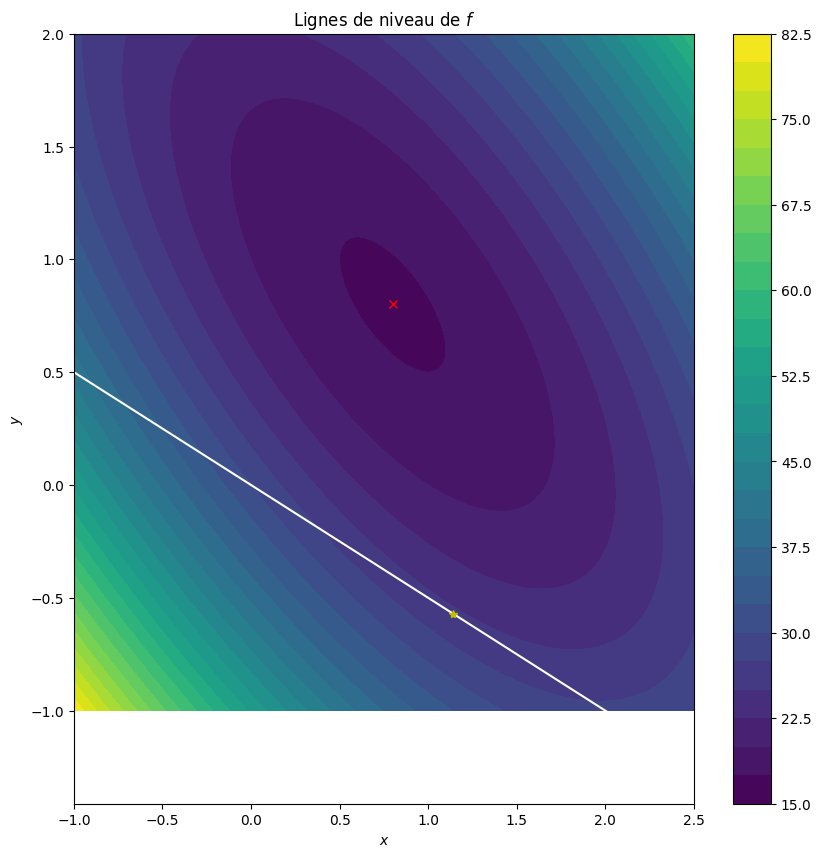

In [13]:
### BEGIN SOLUTION
xx = np.linspace(-1,2.5,200)
yy = np.linspace(-1,2,200)
xx,yy = np.meshgrid(xx,yy)
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        zz[i,j] = f(np.array([xx[i,j],yy[i,j]]))
        
plt.figure(figsize=[10,10])
plt.title("Lignes de niveau de $f$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Tracé de f
plt.contourf(xx,yy,zz,levels=30)
plt.colorbar()
plt.plot(xs[0],xs[1],'rx')
xa=np.array([-1,2.5])
ya=-xa*c[0]/c[1]
plt.plot(xa,ya,'w-')
plt.plot(xc[0],xc[1],'*y')
### END SOLUTION
